In [144]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import io
import requests
from sklearn.linear_model import LinearRegression

Data and Basic Analysis

In [145]:
AMTRAK_RAD = pd.read_csv('AMTRAK_RAD.csv')
#No AMTRAK AQ data available
CROADS_RAD = pd.read_csv('CROADS_RAD.csv')
CROADS_AQ = pd.read_csv('CROADS_AQ.csv')
DWNTWNBERK_RAD = pd.read_csv('DWNTWNBERK_RAD.csv')
DWNTWNBERK_AQ = pd.read_csv('DWNTWNBERK_AQ.csv')
ETCH_RAD = pd.read_csv('ETCH_RAD.csv')
ETCH_AQ = pd.read_csv('ETCH_AQ.csv')
FRWY_RAD = pd.read_csv('FRWY_RAD.csv')
FRWY_AQ = pd.read_csv('FRWY_AQ.csv')
MARDOCKS_RAD = pd.read_csv('MARDOCKS_RAD.csv')
MARDOCKS_AQ = pd.read_csv('MARDOCKS_AQ.csv')
MAREXT_RAD = pd.read_csv('MAREXT_RAD.csv')
MAREXT_AQ = pd.read_csv('MAREXT_AQ.csv')
MARHOTEL_RAD = pd.read_csv('MARHOTEL_RAD.csv')
MARHOTEL_AQ = pd.read_csv('MARHOTEL_AQ.csv')
NRTBERK_RAD = pd.read_csv('NRTBERK_RAD.csv')
NRTBERK_AQ = pd.read_csv('NRTBERK_AQ.csv')
PHYSBLDG_RAD = pd.read_csv('PHYBLDG_RAD.csv')
PHYSBLDG_AQ = pd.read_csv('PHYBLDG_AQ.csv')
RSFSTR_RAD = pd.read_csv('RSFSTR_RAD.csv')
RSFSTR_AQ = pd.read_csv('RSFSTR_AQ.csv')
SUDAVENT_RAD = pd.read_csv('SUDAVENT_RAD.csv')
SUDAVENT_AQ = pd.read_csv('SUDAVENT_AQ.csv')

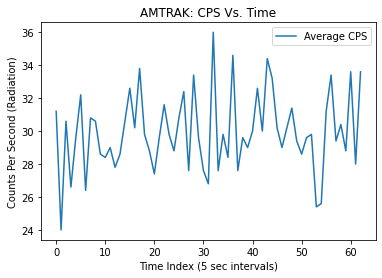

In [146]:
plt.plot(AMTRAK_RAD["Average CPS"], label = "Average CPS")
plt.ylabel('Counts Per Second (Radiation)') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("AMTRAK: CPS Vs. Time")     
plt.legend()
plt.savefig('AMTRAK_CPS_AIR.png',dpi=300)
plt.show()

In [147]:
AMTRAK_mean_cps = np.mean(AMTRAK_RAD["Average CPS"])
AMTRAK_mean_unc = np.sqrt (AMTRAK_mean_cps)

AMTRAK_mean_unc_sig = AMTRAK_mean_unc / np.sqrt (2 * len(AMTRAK_RAD["Average CPS"]))
AMTRAK_tot_counts = np.sum(AMTRAK_RAD["Average CPS"]) * 5
AMTRAK_tot_unc = np.sqrt(AMTRAK_tot_counts)
AMTRAK_std_cps = np.std(AMTRAK_RAD["Average CPS"])
AMTRAK_sig_variance = (AMTRAK_std_cps - AMTRAK_mean_unc) / AMTRAK_mean_unc_sig
print ("The total counts measured at the Amtrak station was {0} +/- {1}".format(AMTRAK_tot_counts, AMTRAK_tot_unc))
print ("The mean cps measured at the Amtrak station was {0} +/- {1}".format(AMTRAK_mean_cps, AMTRAK_mean_unc))
print ("The standard deviation of the cps values is {0}".format(AMTRAK_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(AMTRAK_sig_variance))
print ()


The total counts measured at the Amtrak station was 9430.0 +/- 97.10818709048172
The mean cps measured at the Amtrak station was 29.936507936507937 +/- 5.471426499232895
The standard deviation of the cps values is 2.3706741113026277
The measured and expected uncertainty on the mean cps differ by -6.36138660282625 sigma



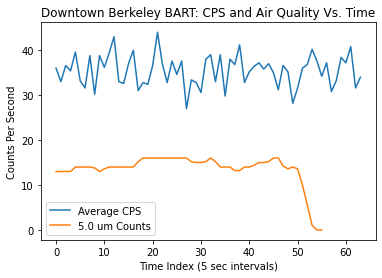

In [148]:
plt.plot(DWNTWNBERK_RAD["Average CPS"], label = "Average CPS")
plt.plot(DWNTWNBERK_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Downtown Berkeley BART: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Downtown__Berkeley_CPS_AIR.png',dpi=300)
plt.show()

In [149]:
DWNTWNBERK_mean_cps = np.mean(DWNTWNBERK_RAD["Average CPS"])
DWNTWNBERK_mean_unc = np.sqrt (DWNTWNBERK_mean_cps)
DWNTWNBERK_mean_unc_sig = DWNTWNBERK_mean_unc / np.sqrt (2 * len(DWNTWNBERK_RAD["Average CPS"]))
DWNTWNBERK_tot_counts = np.sum(DWNTWNBERK_RAD["Average CPS"]) * 5
DWNTWNBERK_tot_unc = np.sqrt(DWNTWNBERK_tot_counts)
DWNTWNBERK_std_cps = np.std(DWNTWNBERK_RAD["Average CPS"])
DWNTWNBERK_sig_variance = (DWNTWNBERK_std_cps - DWNTWNBERK_mean_unc) / DWNTWNBERK_mean_unc_sig
print ("The total counts measured at the Downtown Berkeley BART station was {0} +/- {1}".format(DWNTWNBERK_tot_counts, DWNTWNBERK_tot_unc))
print ("The mean cps measured at the Downtown Berkeley BART station was {0} +/- {1}".format(DWNTWNBERK_mean_cps, DWNTWNBERK_mean_unc))
print ("The standard deviation of the cps values is {0}".format(DWNTWNBERK_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(DWNTWNBERK_sig_variance))
print ()

DWNTWNBERK_mean_aq = np.mean(DWNTWNBERK_AQ["5.0 um"])
DWNTWNBERK_mean_unc_aq = np.sqrt (DWNTWNBERK_mean_aq)
DWNTWNBERK_aq_unc_sig = DWNTWNBERK_mean_unc_aq / np.sqrt (2 * len(DWNTWNBERK_AQ["5.0 um"]))
DWNTWNBERK_tot_aq = np.sum(DWNTWNBERK_AQ["5.0 um"]) * 5
DWNTWNBERK_tot_unc_aq = np.sqrt(DWNTWNBERK_tot_aq)
DWNTWNBERK_std_aq = np.std(DWNTWNBERK_AQ["5.0 um"])
DWNTWNBERK_sig_variance_aq = (DWNTWNBERK_std_aq - DWNTWNBERK_mean_unc_aq) / DWNTWNBERK_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the Downtown Berkeley BART station was {0} +/- {1}".format(DWNTWNBERK_tot_aq, DWNTWNBERK_tot_unc_aq))
print ("The mean particle cps measured at the Downtown Berkeley BART station was {0} +/- {1}".format(DWNTWNBERK_mean_aq, DWNTWNBERK_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(DWNTWNBERK_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(DWNTWNBERK_sig_variance_aq))


The total counts measured at the Downtown Berkeley BART station was 11348.000000000002 +/- 106.52699188468621
The mean cps measured at the Downtown Berkeley BART station was 35.462500000000006 +/- 5.95503988231817
The standard deviation of the cps values is 3.4703881267085963
The measured and expected uncertainty on the mean cps differ by -4.72047647706342 sigma

The total counts of 5 nanometer particles measured at the Downtown Berkeley BART station was 3796.0 +/- 61.61168720299745
The mean particle cps measured at the Downtown Berkeley BART station was 13.557142857142859 +/- 3.6820025607192153
The standard deviation of the particle cps values is 3.5526075505413295
The measured and expected uncertainty on the mean particle cps differ by -0.371913937785514 sigma


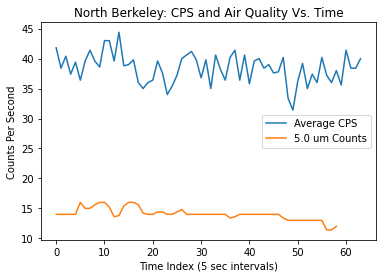

In [150]:
plt.plot(NRTBERK_RAD["Average CPS"], label = "Average CPS")
plt.plot(NRTBERK_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("North Berkeley: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('North_Berkeley_CPS_AIR.png',dpi=300)
plt.show()

In [151]:
NRTBERK_mean_cps = np.mean(NRTBERK_RAD["Average CPS"])
NRTBERK_mean_unc = np.sqrt (NRTBERK_mean_cps)
NRTBERK_mean_unc_sig = NRTBERK_mean_unc / np.sqrt (2 * len(NRTBERK_RAD["Average CPS"]))
NRTBERK_tot_counts = np.sum(NRTBERK_RAD["Average CPS"]) * 5
NRTBERK_tot_unc = np.sqrt(NRTBERK_tot_counts)
NRTBERK_std_cps = np.std(NRTBERK_RAD["Average CPS"])
NRTBERK_sig_variance = (NRTBERK_std_cps - NRTBERK_mean_unc) / NRTBERK_mean_unc_sig
print ("The total counts measured at the the North Berkeley BART station was {0} +/- {1}".format(NRTBERK_tot_counts, NRTBERK_tot_unc))
print ("The mean cps measured at the the North Berkeley BART station was {0} +/- {1}".format(NRTBERK_mean_cps, NRTBERK_mean_unc))
print ("The standard deviation of the cps values is {0}".format(NRTBERK_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(NRTBERK_sig_variance))
print ()

NRTBERK_mean_aq = np.mean(NRTBERK_AQ["5.0 um"])
NRTBERK_mean_unc_aq = np.sqrt (NRTBERK_mean_aq)
NRTBERK_aq_unc_sig = NRTBERK_mean_unc_aq / np.sqrt (2 * len(NRTBERK_AQ["5.0 um"]))
NRTBERK_tot_aq = np.sum(NRTBERK_AQ["5.0 um"]) * 5
NRTBERK_tot_unc_aq = np.sqrt(NRTBERK_tot_aq)
NRTBERK_std_aq = np.std(NRTBERK_AQ["5.0 um"])
NRTBERK_sig_variance_aq = (NRTBERK_std_aq - NRTBERK_mean_unc_aq) / NRTBERK_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the North Berkeley BART station was {0} +/- {1}".format(NRTBERK_tot_aq, NRTBERK_tot_unc_aq))
print ("The mean particle cps measured at the North Berkeley BART station was {0} +/- {1}".format(NRTBERK_mean_aq, NRTBERK_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(NRTBERK_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(NRTBERK_sig_variance_aq))


The total counts measured at the the North Berkeley BART station was 12285.0 +/- 110.83771921146699
The mean cps measured at the the North Berkeley BART station was 38.390625 +/- 6.196016865696865
The standard deviation of the cps values is 2.440140797039179
The measured and expected uncertainty on the mean cps differ by -6.858097374518165 sigma

The total counts of 5 nanometer particles measured at the North Berkeley BART station was 4143.0 +/- 64.36614016701638
The mean particle cps measured at the North Berkeley BART station was 14.044067796610168 +/- 3.7475415670289993
The standard deviation of the particle cps values is 0.9929021298554135
The measured and expected uncertainty on the mean particle cps differ by -7.984712911975132 sigma


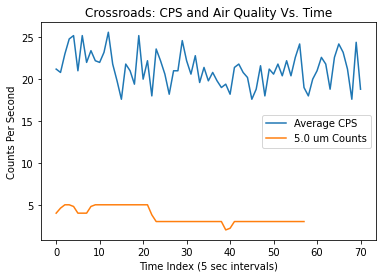

In [152]:
plt.plot(CROADS_RAD["Average CPS"], label = "Average CPS")
plt.plot(CROADS_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Crossroads: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Crossroads.png',dpi=300)
plt.show()

In [153]:
CROADS_mean_cps = np.mean(CROADS_RAD["Average CPS"])
CROADS_mean_unc = np.sqrt (CROADS_mean_cps)
CROADS_mean_unc_sig = CROADS_mean_unc / np.sqrt (2 * len(CROADS_RAD["Average CPS"]))
CROADS_tot_counts = np.sum(CROADS_RAD["Average CPS"]) * 5
CROADS_tot_unc = np.sqrt(CROADS_tot_counts)
CROADS_std_cps = np.std(CROADS_RAD["Average CPS"])
CROADS_sig_variance = (CROADS_std_cps - CROADS_mean_unc) / CROADS_mean_unc_sig
print ("The total counts measured at the Crossroads was {0} +/- {1}".format(CROADS_tot_counts, CROADS_tot_unc))
print ("The mean cps measured at the Crossroads was {0} +/- {1}".format(CROADS_mean_cps, CROADS_mean_unc))
print ("The standard deviation of the cps values is {0}".format(CROADS_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(CROADS_sig_variance))
print ()

CROADS_mean_aq = np.mean(CROADS_AQ["5.0 um"])
CROADS_mean_unc_aq = np.sqrt (CROADS_mean_aq)
CROADS_aq_unc_sig = CROADS_mean_unc_aq / np.sqrt (2 * len(CROADS_AQ["5.0 um"]))
CROADS_tot_aq = np.sum(CROADS_AQ["5.0 um"]) * 5
CROADS_tot_unc_aq = np.sqrt(CROADS_tot_aq)
CROADS_std_aq = np.std(CROADS_AQ["5.0 um"])
CROADS_sig_variance_aq = (CROADS_std_aq - CROADS_mean_unc_aq) / CROADS_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at Crossroads was {0} +/- {1}".format(CROADS_tot_aq, CROADS_tot_unc_aq))
print ("The mean particle cps measured at Crossroads was {0} +/- {1}".format(CROADS_mean_aq, CROADS_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(CROADS_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(CROADS_sig_variance_aq))


The total counts measured at the Crossroads was 7540.0 +/- 86.83317338436964
The mean cps measured at the Crossroads was 21.239436619718308 +/- 4.608626326761404
The standard deviation of the cps values is 2.0383975253455966
The measured and expected uncertainty on the mean cps differ by -6.645757065476697 sigma

The total counts of 5 nanometer particles measured at Crossroads was 1061.0 +/- 32.57299494980466
The mean particle cps measured at Crossroads was 3.658620689655172 +/- 1.912752124467562
The standard deviation of the particle cps values is 0.9299674600830491
The measured and expected uncertainty on the mean particle cps differ by -5.5338664324926 sigma


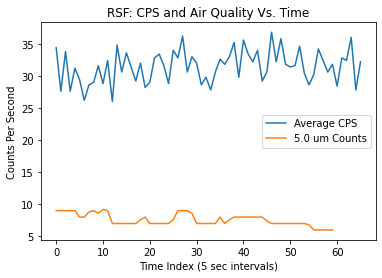

In [154]:
plt.plot(RSFSTR_RAD["Average CPS"], label = "Average CPS")
plt.plot(RSFSTR_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("RSF: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('RSF_CPS_AIR.png',dpi=300)
plt.show()

In [155]:
RSFSTR_mean_cps = np.mean(RSFSTR_RAD["Average CPS"])
RSFSTR_mean_unc = np.sqrt (RSFSTR_mean_cps)
RSFSTR_mean_unc_sig = RSFSTR_mean_unc / np.sqrt (2 * len(RSFSTR_RAD["Average CPS"]))
RSFSTR_tot_counts = np.sum(RSFSTR_RAD["Average CPS"]) * 5
RSFSTR_tot_unc = np.sqrt(RSFSTR_tot_counts)
RSFSTR_std_cps = np.std(RSFSTR_RAD["Average CPS"])
RSFSTR_sig_variance = (RSFSTR_std_cps - RSFSTR_mean_unc) / RSFSTR_mean_unc_sig
print ("The total counts measured at the RSF was {0} +/- {1}".format(RSFSTR_tot_counts, RSFSTR_tot_unc))
print ("The mean cps measured at the RSF was {0} +/- {1}".format(RSFSTR_mean_cps, RSFSTR_mean_unc))
print ("The standard deviation of the cps values is {0}".format(RSFSTR_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(RSFSTR_sig_variance))
print ()

RSFSTR_mean_aq = np.mean(RSFSTR_AQ["5.0 um"])
RSFSTR_mean_unc_aq = np.sqrt (RSFSTR_mean_aq)
RSFSTR_aq_unc_sig = RSFSTR_mean_unc_aq / np.sqrt (2 * len(RSFSTR_AQ["5.0 um"]))
RSFSTR_tot_aq = np.sum(RSFSTR_AQ["5.0 um"]) * 5
RSFSTR_tot_unc_aq = np.sqrt(RSFSTR_tot_aq)
RSFSTR_std_aq = np.std(RSFSTR_AQ["5.0 um"])
RSFSTR_sig_variance_aq = (RSFSTR_std_aq - RSFSTR_mean_unc_aq) / RSFSTR_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the RSF was {0} +/- {1}".format(RSFSTR_tot_aq, RSFSTR_tot_unc_aq))
print ("The mean particle cps measured at the RSF was {0} +/- {1}".format(RSFSTR_mean_aq, RSFSTR_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(RSFSTR_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(RSFSTR_sig_variance_aq))


The total counts measured at the RSF was 10384.0 +/- 101.90191362285597
The mean cps measured at the RSF was 31.46666666666667 +/- 5.609515724790035
The standard deviation of the cps values is 2.514282434734841
The measured and expected uncertainty on the mean cps differ by -6.339499669033413 sigma

The total counts of 5 nanometer particles measured at the RSF was 2276.0 +/- 47.70744176750625
The mean particle cps measured at the RSF was 7.586666666666667 +/- 2.754390434681813
The standard deviation of the particle cps values is 0.9113116310510302
The measured and expected uncertainty on the mean particle cps differ by -7.330085258046078 sigma


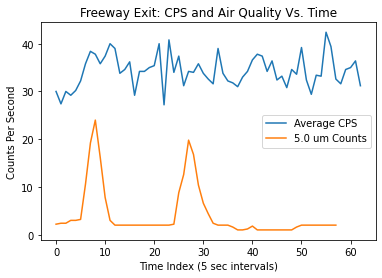

In [156]:
plt.plot(FRWY_RAD["Average CPS"], label = "Average CPS")
plt.plot(FRWY_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Freeway Exit: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Freeway_Exit_CPS_AIR.png',dpi=300)
plt.show()

In [157]:
FRWY_mean_cps = np.mean(FRWY_RAD["Average CPS"])
FRWY_mean_unc = np.sqrt (FRWY_mean_cps)
FRWY_mean_unc_sig = FRWY_mean_unc / np.sqrt (2 * len(FRWY_RAD["Average CPS"]))
FRWY_tot_counts = np.sum(FRWY_RAD["Average CPS"]) * 5
FRWY_tot_unc = np.sqrt(FRWY_tot_counts)
FRWY_std_cps = np.std(FRWY_RAD["Average CPS"])
FRWY_sig_variance = (FRWY_std_cps - FRWY_mean_unc) / FRWY_mean_unc_sig
print ("The total counts measured at the Freeway exit was {0} +/- {1}".format(FRWY_tot_counts, FRWY_tot_unc))
print ("The mean cps measured at the Freeway exit was {0} +/- {1}".format(FRWY_mean_cps, FRWY_mean_unc))
print ("The standard deviation of the cps values is {0}".format(FRWY_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(FRWY_sig_variance))
print ()

FRWY_mean_aq = np.mean(FRWY_AQ["5.0 um"])
FRWY_mean_unc_aq = np.sqrt (FRWY_mean_aq)
FRWY_aq_unc_sig = FRWY_mean_unc_aq / np.sqrt (2 * len(FRWY_AQ["5.0 um"]))
FRWY_tot_aq = np.sum(FRWY_AQ["5.0 um"]) * 5
FRWY_tot_unc_aq = np.sqrt(FRWY_tot_aq)
FRWY_std_aq = np.std(FRWY_AQ["5.0 um"])
FRWY_sig_variance_aq = (FRWY_std_aq - FRWY_mean_unc_aq) / FRWY_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the Freeway exit was {0} +/- {1}".format(FRWY_tot_aq, FRWY_tot_unc_aq))
print ("The mean particle cps measured at the Freeway exit was {0} +/- {1}".format(FRWY_mean_aq, FRWY_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(FRWY_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(FRWY_sig_variance_aq))


The total counts measured at the Freeway exit was 10806.0 +/- 103.95191195932858
The mean cps measured at the Freeway exit was 34.304761904761904 +/- 5.857026711972714
The standard deviation of the cps values is 3.2934484542935287
The measured and expected uncertainty on the mean cps differ by -4.9130891813131345 sigma

The total counts of 5 nanometer particles measured at the Freeway exit was 1216.0 +/- 34.87119154832539
The mean particle cps measured at the Freeway exit was 4.193103448275862 +/- 2.0477068755746908
The standard deviation of the particle cps values is 5.281844703515721
The measured and expected uncertainty on the mean particle cps differ by 17.010603832213572 sigma


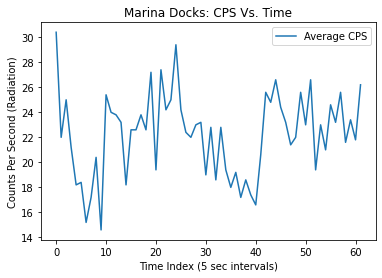

In [158]:
plt.plot(MARDOCKS_RAD["Average CPS"], label = "Average CPS")

plt.ylabel('Counts Per Second (Radiation)') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Marina Docks: CPS Vs. Time")     
plt.legend()
plt.savefig('Marina_Docs_CPS.png',dpi=300)
plt.show()
#No air quality data available

In [159]:
MARDOCKS_mean_cps = np.mean(MARDOCKS_RAD["Average CPS"])
MARDOCKS_mean_unc = np.sqrt (MARDOCKS_mean_cps)
MARDOCKS_mean_unc_sig = MARDOCKS_mean_unc / np.sqrt (2 * len(MARDOCKS_RAD["Average CPS"]))
MARDOCKS_tot_counts = np.sum(MARDOCKS_RAD["Average CPS"]) * 5
MARDOCKS_tot_unc = np.sqrt(MARDOCKS_tot_counts)
MARDOCKS_std_cps = np.std(MARDOCKS_RAD["Average CPS"])
MARDOCKS_sig_variance = (MARDOCKS_std_cps - MARDOCKS_mean_unc) / MARDOCKS_mean_unc_sig
print ("The total counts measured at the Marina Docks was {0} +/- {1}".format(MARDOCKS_tot_counts, MARDOCKS_tot_unc))
print ("The mean cps measured at the Marina Docks was {0} +/- {1}".format(MARDOCKS_mean_cps, MARDOCKS_mean_unc))
print ("The standard deviation of the cps values is {0}".format(MARDOCKS_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(MARDOCKS_sig_variance))
print ()


The total counts measured at the Marina Docks was 6896.999999999999 +/- 83.04817878797824
The mean cps measured at the Marina Docks was 22.24838709677419 +/- 4.71681959552983
The standard deviation of the cps values is 3.316758130361239
The measured and expected uncertainty on the mean cps differ by -3.305283220466967 sigma



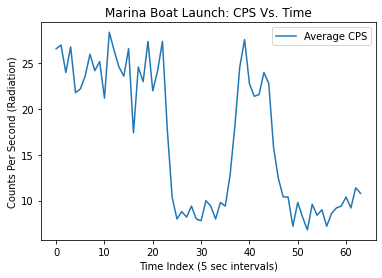

In [160]:
plt.plot(MAREXT_RAD["Average CPS"], label = "Average CPS")

plt.ylabel('Counts Per Second (Radiation)') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Marina Boat Launch: CPS Vs. Time")     
plt.legend()
plt.savefig('Marina_Boat_Launch_CPS.png',dpi=300)
plt.show()

In [161]:
MAREXT_mean_cps = np.mean(MAREXT_RAD["Average CPS"])
MAREXT_mean_unc = np.sqrt (MAREXT_mean_cps)
MAREXT_mean_unc_sig = MAREXT_mean_unc / np.sqrt (2 * len(MAREXT_RAD["Average CPS"]))
MAREXT_tot_counts = np.sum(MAREXT_RAD["Average CPS"]) * 5
MAREXT_tot_unc = np.sqrt(MAREXT_tot_counts)
MAREXT_std_cps = np.std(MAREXT_RAD["Average CPS"])
MAREXT_sig_variance = (MAREXT_std_cps - MAREXT_mean_unc) / MAREXT_mean_unc_sig
print ("The total counts measured at the Marina boat launch was {0} +/- {1}".format(MAREXT_tot_counts, MAREXT_tot_unc))
print ("The mean cps measured at the Marina boat launch was {0} +/- {1}".format(MAREXT_mean_cps, MAREXT_mean_unc))
print ("The standard deviation of the cps values is {0}".format(MAREXT_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(MAREXT_sig_variance))
print ()


The total counts measured at the Marina boat launch was 5346.000000000002 +/- 73.11634564172365
The mean cps measured at the Marina boat launch was 16.706250000000004 +/- 4.087327978031614
The standard deviation of the cps values is 7.572315427760521
The measured and expected uncertainty on the mean cps differ by 9.646432177884844 sigma



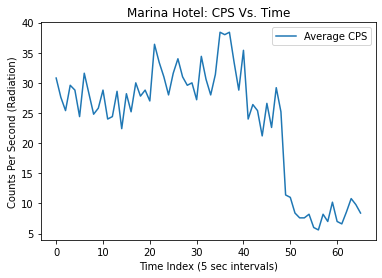

In [162]:
plt.plot(MARHOTEL_RAD["Average CPS"], label = "Average CPS")

plt.ylabel('Counts Per Second (Radiation)') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Marina Hotel: CPS Vs. Time")     
plt.legend()
plt.savefig('Marina_Hotel_CPS.png',dpi=300)
plt.show()

In [163]:
MARHOTEL_mean_cps = np.mean(MARHOTEL_RAD["Average CPS"])
MARHOTEL_mean_unc = np.sqrt (MARHOTEL_mean_cps)
MARHOTEL_mean_unc_sig = MARHOTEL_mean_unc / np.sqrt (2 * len(MARHOTEL_RAD["Average CPS"]))
MARHOTEL_tot_counts = np.sum(MARHOTEL_RAD["Average CPS"]) * 5
MARHOTEL_tot_unc = np.sqrt(MARHOTEL_tot_counts)
MARHOTEL_std_cps = np.std(MARHOTEL_RAD["Average CPS"])
MARHOTEL_sig_variance = (MARHOTEL_std_cps - MARHOTEL_mean_unc) / MARHOTEL_mean_unc_sig
print ("The total counts measured at the marina hotel was {0} +/- {1}".format(MARHOTEL_tot_counts, MARHOTEL_tot_unc))
print ("The mean cps measured at the marina hotel was {0} +/- {1}".format(MARHOTEL_mean_cps, MARHOTEL_mean_unc))
print ("The standard deviation of the cps values is {0}".format(MARHOTEL_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(MARHOTEL_sig_variance))
print ()


The total counts measured at the marina hotel was 7821.0 +/- 88.43641783790206
The mean cps measured at the marina hotel was 23.7 +/- 4.868264577855234
The standard deviation of the cps values is 9.734988443752771
The measured and expected uncertainty on the mean cps differ by 11.48548920624482 sigma



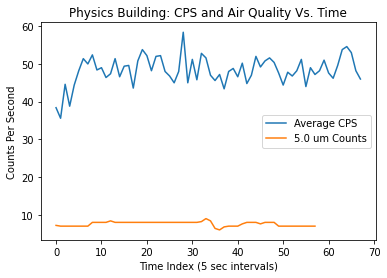

In [164]:
plt.plot(PHYSBLDG_RAD["Average CPS"], label = "Average CPS")
plt.plot(PHYSBLDG_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Physics Building: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Physics_Building_Air.png',dpi=300)
plt.show()

In [165]:
PHYSBLDG_mean_cps = np.mean(PHYSBLDG_RAD["Average CPS"])
PHYSBLDG_mean_unc = np.sqrt (PHYSBLDG_mean_cps)
PHYSBLDG_mean_unc_sig = PHYSBLDG_mean_unc / np.sqrt (2 * len(PHYSBLDG_RAD["Average CPS"]))
PHYSBLDG_tot_counts = np.sum(PHYSBLDG_RAD["Average CPS"]) * 5
PHYSBLDG_tot_unc = np.sqrt(PHYSBLDG_tot_counts)
PHYSBLDG_std_cps = np.std(PHYSBLDG_RAD["Average CPS"])
PHYSBLDG_sig_variance = (PHYSBLDG_std_cps - PHYSBLDG_mean_unc) / PHYSBLDG_mean_unc_sig
print ("The total counts measured at the Physics Building was {0} +/- {1}".format(PHYSBLDG_tot_counts, PHYSBLDG_tot_unc))
print ("The mean cps measured at the Physics Building was {0} +/- {1}".format(PHYSBLDG_mean_cps, PHYSBLDG_mean_unc))
print ("The standard deviation of the cps values is {0}".format(PHYSBLDG_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(PHYSBLDG_sig_variance))
print ()

PHYSBLDG_mean_aq = np.mean(PHYSBLDG_AQ["5.0 um"])
PHYSBLDG_mean_unc_aq = np.sqrt (PHYSBLDG_mean_aq)
PHYSBLDG_aq_unc_sig = PHYSBLDG_mean_unc_aq / np.sqrt (2 * len(PHYSBLDG_AQ["5.0 um"]))
PHYSBLDG_tot_aq = np.sum(PHYSBLDG_AQ["5.0 um"]) * 5
PHYSBLDG_tot_unc_aq = np.sqrt(PHYSBLDG_tot_aq)
PHYSBLDG_std_aq = np.std(PHYSBLDG_AQ["5.0 um"])
PHYSBLDG_sig_variance_aq = (PHYSBLDG_std_aq - PHYSBLDG_mean_unc_aq) / PHYSBLDG_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the Physics Building was {0} +/- {1}".format(PHYSBLDG_tot_aq, PHYSBLDG_tot_unc_aq))
print ("The mean particle cps measured at the Physics Building was {0} +/- {1}".format(PHYSBLDG_mean_aq, PHYSBLDG_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(PHYSBLDG_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(PHYSBLDG_sig_variance_aq))


The total counts measured at the Physics Building was 16422.0 +/- 128.1483515305601
The mean cps measured at the Physics Building was 48.300000000000004 +/- 6.9498201415576215
The standard deviation of the cps values is 3.741421560599346
The measured and expected uncertainty on the mean cps differ by -5.383741565681645 sigma

The total counts of 5 nanometer particles measured at the Physics Building was 2203.0 +/- 46.93612681080534
The mean particle cps measured at the Physics Building was 7.596551724137932 +/- 2.7561842689011073
The standard deviation of the particle cps values is 0.5854457533224015
The measured and expected uncertainty on the mean particle cps differ by -8.482585719311553 sigma


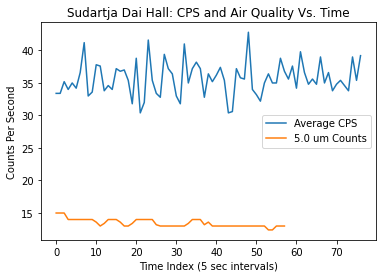

In [166]:
plt.plot(SUDAVENT_RAD["Average CPS"], label = "Average CPS")
plt.plot(SUDAVENT_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Sudartja Dai Hall: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Sudavent_Dai_Air.png',dpi=300)
plt.show()

In [167]:
SUDAVENT_mean_cps = np.mean(SUDAVENT_RAD["Average CPS"])
SUDAVENT_mean_unc = np.sqrt (SUDAVENT_mean_cps)
SUDAVENT_mean_unc_sig = SUDAVENT_mean_unc / np.sqrt (2 * len(SUDAVENT_RAD["Average CPS"]))
SUDAVENT_tot_counts = np.sum(SUDAVENT_RAD["Average CPS"]) * 5
SUDAVENT_tot_unc = np.sqrt(SUDAVENT_tot_counts)
SUDAVENT_std_cps = np.std(SUDAVENT_RAD["Average CPS"])
SUDAVENT_sig_variance = (SUDAVENT_std_cps - SUDAVENT_mean_unc) / SUDAVENT_mean_unc_sig
print ("The total counts measured at the Sudartja Hall cafe was {0} +/- {1}".format(SUDAVENT_tot_counts, SUDAVENT_tot_unc))
print ("The mean cps measured at the Sudartja Hall cafe was {0} +/- {1}".format(SUDAVENT_mean_cps, SUDAVENT_mean_unc))
print ("The standard deviation of the cps values is {0}".format(SUDAVENT_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(SUDAVENT_sig_variance))
print ()

SUDAVENT_mean_aq = np.mean(SUDAVENT_AQ["5.0 um"])
SUDAVENT_mean_unc_aq = np.sqrt (SUDAVENT_mean_aq)
SUDAVENT_aq_unc_sig = SUDAVENT_mean_unc_aq / np.sqrt (2 * len(SUDAVENT_AQ["5.0 um"]))
SUDAVENT_tot_aq = np.sum(SUDAVENT_AQ["5.0 um"]) * 5
SUDAVENT_tot_unc_aq = np.sqrt(SUDAVENT_tot_aq)
SUDAVENT_std_aq = np.std(SUDAVENT_AQ["5.0 um"])
SUDAVENT_sig_variance_aq = (SUDAVENT_std_aq - SUDAVENT_mean_unc_aq) / SUDAVENT_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the Sudartja Hall cafe was {0} +/- {1}".format(SUDAVENT_tot_aq, SUDAVENT_tot_unc_aq))
print ("The mean particle cps measured at the Sudartja Hall cafe was {0} +/- {1}".format(SUDAVENT_mean_aq, SUDAVENT_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(SUDAVENT_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(SUDAVENT_sig_variance_aq))


The total counts measured at the Sudartja Hall cafe was 13721.000000000002 +/- 117.13667231059623
The mean cps measured at the Sudartja Hall cafe was 35.63896103896104 +/- 5.969837605744485
The standard deviation of the cps values is 2.539462866007827
The measured and expected uncertainty on the mean cps differ by -7.130818929248572 sigma

The total counts of 5 nanometer particles measured at the Sudartja Hall cafe was 3901.0 +/- 62.457985878508765
The mean particle cps measured at the Sudartja Hall cafe was 13.451724137931036 +/- 3.667659217802417
The standard deviation of the particle cps values is 0.594875060574254
The measured and expected uncertainty on the mean particle cps differ by -9.023438722499654 sigma


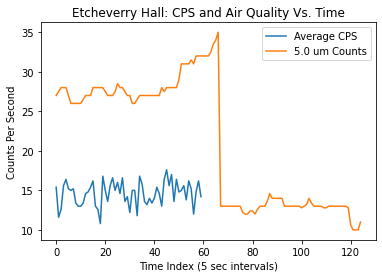

In [168]:
plt.plot(ETCH_RAD["Average CPS"], label = "Average CPS")
plt.plot(ETCH_AQ["5.0 um"], label = "5.0 um Counts")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Etcheverry Hall: CPS and Air Quality Vs. Time")     
plt.legend()
plt.savefig('Etcheverry_Hall_CPS_Air.png',dpi=300)
plt.show()

In [169]:
ETCH_mean_cps = np.mean(ETCH_RAD["Average CPS"])
ETCH_mean_unc = np.sqrt (ETCH_mean_cps)
ETCH_mean_unc_sig = ETCH_mean_unc / np.sqrt (2 * len(ETCH_RAD["Average CPS"]))
ETCH_tot_counts = np.sum(ETCH_RAD["Average CPS"]) * 5
ETCH_tot_unc = np.sqrt(ETCH_tot_counts)
ETCH_std_cps = np.std(ETCH_RAD["Average CPS"])
ETCH_sig_variance = (ETCH_std_cps - ETCH_mean_unc) / ETCH_mean_unc_sig
print ("The total counts measured at the Etcheverry Hall was {0} +/- {1}".format(ETCH_tot_counts, ETCH_tot_unc))
print ("The mean cps measured at the Etcheverry Hall was {0} +/- {1}".format(ETCH_mean_cps, ETCH_mean_unc))
print ("The standard deviation of the cps values is {0}".format(ETCH_std_cps))
print ("The measured and expected uncertainty on the mean cps differ by {0} sigma".format(ETCH_sig_variance))
print ()

ETCH_mean_aq = np.mean(ETCH_AQ["5.0 um"])
ETCH_mean_unc_aq = np.sqrt (ETCH_mean_aq)
ETCH_aq_unc_sig = ETCH_mean_unc_aq / np.sqrt (2 * len(ETCH_AQ["5.0 um"]))
ETCH_tot_aq = np.sum(ETCH_AQ["5.0 um"]) * 5
ETCH_tot_unc_aq = np.sqrt(ETCH_tot_aq)
ETCH_std_aq = np.std(ETCH_AQ["5.0 um"])
ETCH_sig_variance_aq = (ETCH_std_aq - ETCH_mean_unc_aq) / ETCH_aq_unc_sig
print ("The total counts of 5 nanometer particles measured at the Etcheverry Hall was {0} +/- {1}".format(ETCH_tot_aq, ETCH_tot_unc_aq))
print ("The mean particle cps measured at the Etcheverry Hall was {0} +/- {1}".format(ETCH_mean_aq, ETCH_mean_unc_aq))
print ("The standard deviation of the particle cps values is {0}".format(ETCH_std_aq))
print ("The measured and expected uncertainty on the mean particle cps differ by {0} sigma".format(ETCH_sig_variance_aq))


The total counts measured at the Etcheverry Hall was 4385.0 +/- 66.21933252457322
The mean cps measured at the Etcheverry Hall was 14.616666666666667 +/- 3.8231749458619686
The standard deviation of the cps values is 1.5016842396308072
The measured and expected uncertainty on the mean cps differ by -6.651711443221585 sigma

The total counts of 5 nanometer particles measured at the Etcheverry Hall was 13238.500000000002 +/- 115.05868068077264
The mean particle cps measured at the Etcheverry Hall was 21.181600000000003 +/- 4.602347227230905
The standard deviation of the particle cps values is 7.977963489512846
The measured and expected uncertainty on the mean particle cps differ by 11.596947566620127 sigma


Deeper Analysis

Case 1: Do cars cause greater radiation counts via CO2 emmisions?
To answer, compare CROADS data set to RSF Street data set

In [170]:
CR_counts_diff_mean = CROADS_mean_cps - RSFSTR_mean_cps
CROADS_mean_sig = CR_counts_diff_mean / CROADS_std_cps
RSFSTR_mean_sig = CR_counts_diff_mean / RSFSTR_std_cps

print ("The mean number of counts collected on the street at Croads was {} sigma away from the number of counts collected on the street at the RSF".format(CROADS_mean_sig))
print ("The mean number of counts collected on the street at the RSF was {} sigma away from the number of counts collected on the street at Croads".format(RSFSTR_mean_sig))

The mean number of counts collected on the street at Croads was -5.017289277377043 sigma away from the number of counts collected on the street at the RSF
The mean number of counts collected on the street at the RSF was -4.067653619839624 sigma away from the number of counts collected on the street at Croads


From what we can see, there is a clear marked difference between the two Counts Per Secondond and total counts values, being seperated by hilariously high sigma values and easily be determined to be of different sources.

Case 2: Can we definitively claim that the resulting statistic is due to difference in automobile presence?
To answer, compare RSFSTR to FRWY

In [171]:
RF_counts_diff_mean = FRWY_mean_cps - RSFSTR_mean_cps
FRWY_mean_sig_RSF = RF_counts_diff_mean / FRWY_std_cps
RSFSTR_mean_sig_FRWY = RF_counts_diff_mean / RSFSTR_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the RSF".format(FRWY_mean_sig_RSF))
print ("The mean number of counts collected on the street at the RSF was {} sigma away from the number of counts collected on the street at the freeway exit".format(RSFSTR_mean_sig_FRWY))

The mean number of counts collected on the street at the freeway exit was 0.8617396863750307 sigma away from the number of counts collected on the street at the RSF
The mean number of counts collected on the street at the RSF was 1.1287893511432592 sigma away from the number of counts collected on the street at the freeway exit


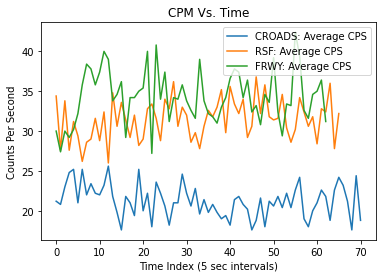

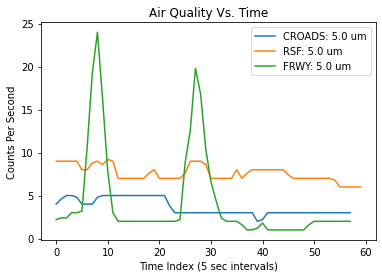

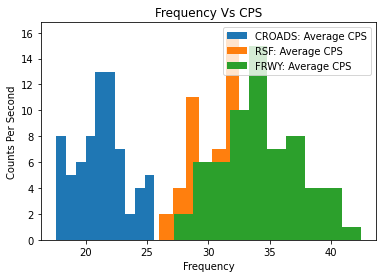

In [172]:
#hard to picture this difference
plt.plot(CROADS_RAD["Average CPS"], label = "CROADS: Average CPS")
plt.plot(RSFSTR_RAD["Average CPS"], label = "RSF: Average CPS")
plt.plot(FRWY_RAD["Average CPS"], label = "FRWY: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('Automobile_CPS.png',dpi=300)
plt.show()

plt.plot(CROADS_AQ["5.0 um"], label = "CROADS: 5.0 um")
plt.plot(RSFSTR_AQ["5.0 um"], label = "RSF: 5.0 um")
plt.plot(FRWY_AQ["5.0 um"], label = "FRWY: 5.0 um")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Air Quality Vs. Time")     
plt.legend()
plt.savefig('Automobile_Air.png',dpi=300)
plt.show()

plt.hist(CROADS_RAD["Average CPS"], label = "CROADS: Average CPS")
plt.hist(RSFSTR_RAD["Average CPS"], label = "RSF: Average CPS")
plt.hist(FRWY_RAD["Average CPS"], label = "FRWY: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Frequency')
plt.title("Frequency Vs CPS")     
plt.legend()
plt.savefig('Automobile_CPS_Frequency.png',dpi=300)
plt.show()

The Freeway data, which yielded the highest cps data and average cps data of our three automobile sets had interesting spikes in dust particle counts, however, has no accompanying changes in radiation

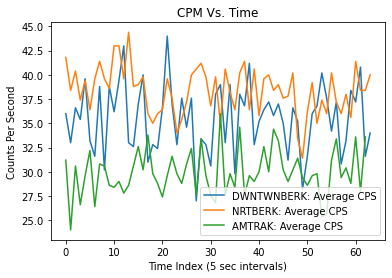

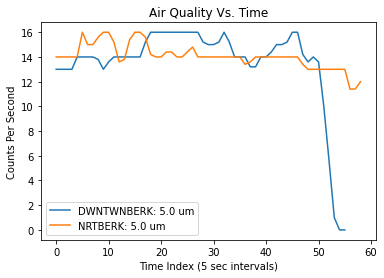

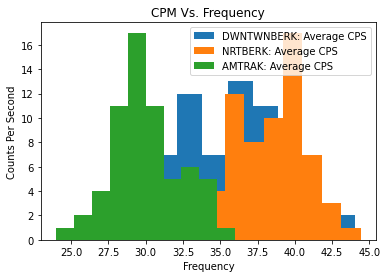

In [173]:
plt.plot(DWNTWNBERK_RAD["Average CPS"], label = "DWNTWNBERK: Average CPS")
plt.plot(NRTBERK_RAD["Average CPS"], label = "NRTBERK: Average CPS")
plt.plot(AMTRAK_RAD["Average CPS"], label = "AMTRAK: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('Train_CPM.png',dpi=300)
plt.show()

plt.plot(DWNTWNBERK_AQ["5.0 um"], label = "DWNTWNBERK: 5.0 um")
plt.plot(NRTBERK_AQ["5.0 um"], label = "NRTBERK: 5.0 um")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Air Quality Vs. Time")   
plt.legend()
plt.savefig('Train_Air.png',dpi=300)
plt.show()

plt.hist(DWNTWNBERK_RAD["Average CPS"], label = "DWNTWNBERK: Average CPS")
plt.hist(NRTBERK_RAD["Average CPS"], label = "NRTBERK: Average CPS")
plt.hist(AMTRAK_RAD["Average CPS"], label = "AMTRAK: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Frequency')
plt.title("CPM Vs. Frequency")     
plt.savefig('Train_Frequency.png',dpi=300)
plt.legend()
plt.show()

The CPS data collected at the North Berkeley BART station is noticeably higher than the AMTRAK, however, the air quality seems to be about the same.

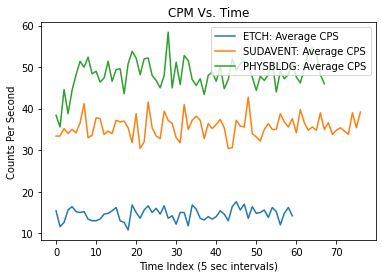

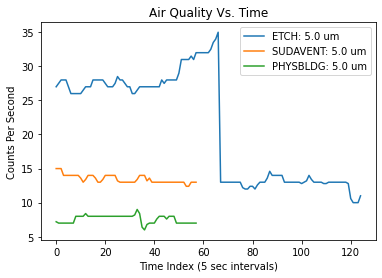

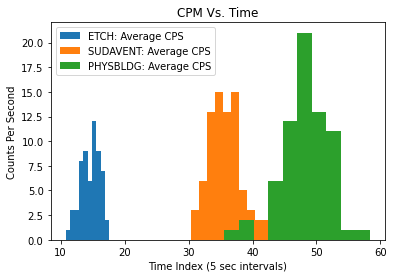

In [174]:
plt.plot(ETCH_RAD["Average CPS"], label = "ETCH: Average CPS")
plt.plot(SUDAVENT_RAD["Average CPS"], label = "SUDAVENT: Average CPS")
plt.plot(PHYSBLDG_RAD["Average CPS"], label = "PHYSBLDG: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('Labs_CPM.png',dpi=300)
plt.show()

plt.plot(ETCH_AQ["5.0 um"], label = "ETCH: 5.0 um")
plt.plot(SUDAVENT_AQ["5.0 um"], label = "SUDAVENT: 5.0 um")
plt.plot(PHYSBLDG_AQ["5.0 um"], label = "PHYSBLDG: 5.0 um")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Air Quality Vs. Time")   
plt.legend()
plt.savefig('Labs_Air.png',dpi=300)
plt.show()

plt.hist(ETCH_RAD["Average CPS"], label = "ETCH: Average CPS")
plt.hist(SUDAVENT_RAD["Average CPS"], label = "SUDAVENT: Average CPS")
plt.hist(PHYSBLDG_RAD["Average CPS"], label = "PHYSBLDG: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('Labs_Frequency.png',dpi=300)
plt.show()

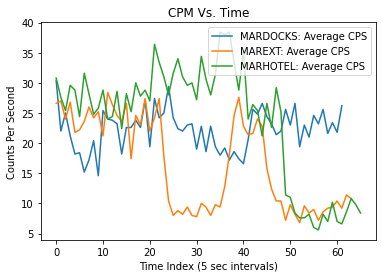

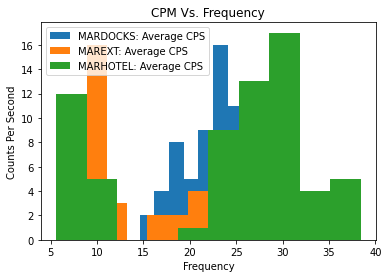

In [175]:
plt.plot(MARDOCKS_RAD["Average CPS"], label = "MARDOCKS: Average CPS")
plt.plot(MAREXT_RAD["Average CPS"], label = "MAREXT: Average CPS")
plt.plot(MARHOTEL_RAD["Average CPS"], label = "MARHOTEL: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('Marina_CPM.png',dpi=300)
plt.show()

plt.hist(MARDOCKS_RAD["Average CPS"], label = "MARDOCKS: Average CPS")
plt.hist(MAREXT_RAD["Average CPS"], label = "MAREXT: Average CPS")
plt.hist(MARHOTEL_RAD["Average CPS"], label = "MARHOTEL: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Frequency')
plt.title("CPM Vs. Frequency")     
plt.legend()
plt.savefig('Marina_Frequency.png',dpi=300)
plt.show()




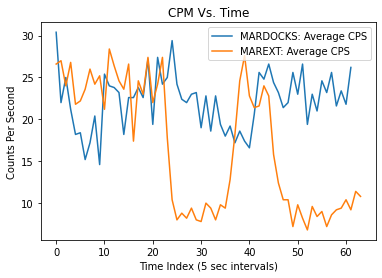

In [176]:
plt.plot(MARDOCKS_RAD["Average CPS"], label = "MARDOCKS: Average CPS")
plt.plot(MAREXT_RAD["Average CPS"], label = "MAREXT: Average CPS")

plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("CPM Vs. Time")     
plt.legend()
plt.savefig('DocksXBoat_CPM.png',dpi=300)
plt.show()

In [177]:
AN_counts_diff_mean = NRTBERK_mean_cps - AMTRAK_mean_cps
NRTBERK_mean_sig_AMTRAK = AN_counts_diff_mean / NRTBERK_std_cps
AMTRAK_mean_sig_NRTBERK = AN_counts_diff_mean / AMTRAK_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the AMTRAK station".format(NRTBERK_mean_sig_AMTRAK))
print ("The mean number of counts collected on the street at the AMTRAK station was {} sigma away from the number of counts collected on the street at the freeway exit".format(AMTRAK_mean_sig_NRTBERK))

The mean number of counts collected on the street at the freeway exit was 3.4646021548224306 sigma away from the number of counts collected on the street at the AMTRAK station
The mean number of counts collected on the street at the AMTRAK station was 3.566123670556613 sigma away from the number of counts collected on the street at the freeway exit


In [178]:
AN_counts_diff_mean = NRTBERK_mean_cps - DWNTWNBERK_mean_cps
NRTBERK_mean_sig_DWNTWNBERK = AN_counts_diff_mean / NRTBERK_std_cps
DWNTWNBERK_mean_sig_NRTBERK = AN_counts_diff_mean / DWNTWNBERK_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the DWNTWNBERK station".format(NRTBERK_mean_sig_DWNTWNBERK))
print ("The mean number of counts collected on the street at the DWNTWNBERK station was {} sigma away from the number of counts collected on the street at the freeway exit".format(DWNTWNBERK_mean_sig_NRTBERK))

The mean number of counts collected on the street at the freeway exit was 1.1999819861021652 sigma away from the number of counts collected on the street at the DWNTWNBERK station
The mean number of counts collected on the street at the DWNTWNBERK station was 0.8437456829294486 sigma away from the number of counts collected on the street at the freeway exit


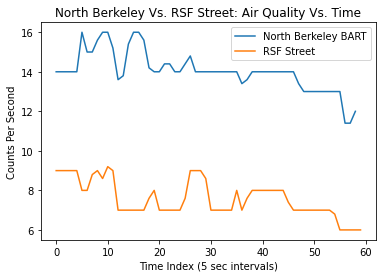

In [179]:
plt.plot(NRTBERK_AQ["5.0 um"], label = "North Berkeley BART")
plt.plot(RSFSTR_AQ["5.0 um"], label = "RSF Street")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("North Berkeley Vs. RSF Street: Air Quality Vs. Time")     
plt.legend()
plt.savefig('NorthXRSF_Air.png',dpi=300)
plt.show()

In [180]:
RN_counts_diff_mean = NRTBERK_mean_cps - RSFSTR_mean_cps
NRTBERK_mean_sig_RSFSTR = RN_counts_diff_mean / NRTBERK_std_cps
RSFSTR_mean_sig_NRTBERK = RN_counts_diff_mean / RSFSTR_std_cps


print ("The mean number of counts collected at the North Berkeley BART station was {} sigma away from the number of counts collected on the street at the RSF".format(NRTBERK_mean_sig_RSFSTR))
print ("The mean number of counts collected on the street at the RSF was {} sigma away from the number of counts collected on the street at the North Berkeley BART station".format(RSFSTR_mean_sig_NRTBERK))

The mean number of counts collected at the North Berkeley BART station was 2.8375241058773053 sigma away from the number of counts collected on the street at the RSF
The mean number of counts collected on the street at the RSF was 2.753850656425375 sigma away from the number of counts collected on the street at the North Berkeley BART station


In [181]:
DL_counts_diff_mean = MARDOCKS_mean_cps - MAREXT_mean_cps
MARDOCKS_mean_sig_MAREXT = RN_counts_diff_mean / MARDOCKS_std_cps
MAREXT_mean_sig_MARDOCKS = RN_counts_diff_mean / MAREXT_std_cps


print ("The mean number of counts collected at the Berkeley Marina docks was {} sigma away from the number of counts collected on the street at the RSF".format(MARDOCKS_mean_sig_MAREXT))
print ("The mean number of counts collected on the street at the RSF was {} sigma away from the number of counts collected on the street at the Berkeley Marina docks".format(MAREXT_mean_sig_MARDOCKS))

The mean number of counts collected at the Berkeley Marina docks was 2.0875680592902386 sigma away from the number of counts collected on the street at the RSF
The mean number of counts collected on the street at the RSF was 0.9143779600027916 sigma away from the number of counts collected on the street at the Berkeley Marina docks


In [182]:
LF_counts_diff_mean = FRWY_mean_cps - MAREXT_mean_cps
FRWY_mean_sig_MAREXT = LF_counts_diff_mean / FRWY_std_cps
MAREXT_mean_sig_FRWY = LF_counts_diff_mean / MAREXT_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the RSF".format(FRWY_mean_sig_MAREXT))
print ("The mean number of counts collected on the street at the RSF was {} sigma away from the number of counts collected on the street at the freeway exit".format(MAREXT_mean_sig_FRWY))

The mean number of counts collected on the street at the freeway exit was 5.3434909181042345 sigma away from the number of counts collected on the street at the RSF
The mean number of counts collected on the street at the RSF was 2.3240595393378354 sigma away from the number of counts collected on the street at the freeway exit


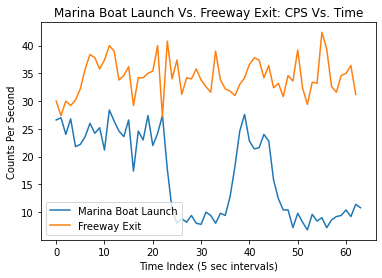

In [183]:
plt.plot(MAREXT_RAD["Average CPS"], label = "Marina Boat Launch")
plt.plot(FRWY_RAD["Average CPS"], label = "Freeway Exit")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Marina Boat Launch Vs. Freeway Exit: CPS Vs. Time")     
plt.legend()
plt.savefig('MarinaXFreeway_CPS.png',dpi=300)
plt.show()

In [184]:
PS_counts_diff_mean = PHYSBLDG_mean_cps - SUDAVENT_mean_cps
PHYSBLDG_mean_sig_SUDAVENT = PS_counts_diff_mean / PHYSBLDG_std_cps
SUDAVENT_mean_sig_PHYSBLDG = PS_counts_diff_mean / SUDAVENT_std_cps


print ("The mean number of counts collected on the street at the Physics Buildingt was {} sigma away from the number of counts collected on the street at Sudartja Dai Hall".format(PHYSBLDG_mean_sig_SUDAVENT))
print ("The mean number of counts collected on the street at Sudartja Dai hall was {} sigma away from the number of counts collected on the street at the Physics Building".format(SUDAVENT_mean_sig_PHYSBLDG))

The mean number of counts collected on the street at the Physics Buildingt was 3.3840182818133875 sigma away from the number of counts collected on the street at Sudartja Dai Hall
The mean number of counts collected on the street at Sudartja Dai hall was 4.9857153378827705 sigma away from the number of counts collected on the street at the Physics Building


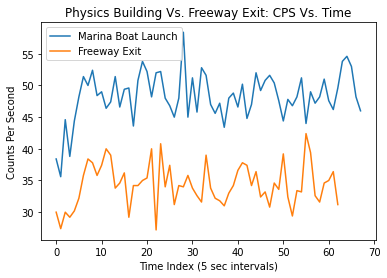

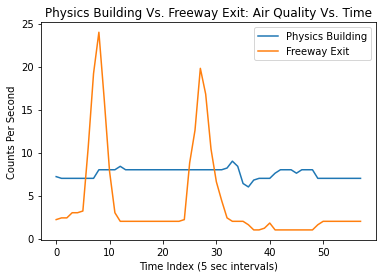

In [185]:
plt.plot(PHYSBLDG_RAD["Average CPS"], label = "Marina Boat Launch")
plt.plot(FRWY_RAD["Average CPS"], label = "Freeway Exit")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Physics Building Vs. Freeway Exit: CPS Vs. Time")     
plt.legend()
plt.savefig('PhysicsXFreeway_CPS.png',dpi=300)
plt.show()

plt.plot(PHYSBLDG_AQ["5.0 um"], label = "Physics Building")
plt.plot(FRWY_AQ["5.0 um"], label = "Freeway Exit")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Physics Building Vs. Freeway Exit: Air Quality Vs. Time")     
plt.legend()
plt.savefig('PhysicsXFreeway_Air.png',dpi=300)
plt.show()

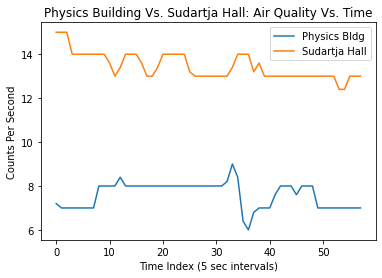

In [186]:
plt.plot(PHYSBLDG_AQ["5.0 um"], label = "Physics Bldg")
plt.plot(SUDAVENT_AQ["5.0 um"], label = "Sudartja Hall")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Physics Building Vs. Sudartja Hall: Air Quality Vs. Time")     
plt.legend()
plt.savefig('PhysicsXSudartja_Air.png',dpi=300)
plt.show()

In [187]:
PS_counts_diff_mean = PHYSBLDG_mean_cps - FRWY_mean_cps
PHYSBLDG_mean_sig_FRWY = PS_counts_diff_mean / PHYSBLDG_std_cps
FRWY_mean_sig_PHYSBLDG = PS_counts_diff_mean / FRWY_std_cps


print ("The mean number of counts collected on the street at the Physics Buildingt was {} sigma away from the number of counts collected on the street at the freeway exit".format(PHYSBLDG_mean_sig_FRWY))
print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the Physics Building".format(FRWY_mean_sig_PHYSBLDG))

The mean number of counts collected on the street at the Physics Buildingt was 3.740620475014362 sigma away from the number of counts collected on the street at the freeway exit
The mean number of counts collected on the street at the freeway exit was 4.249417681637951 sigma away from the number of counts collected on the street at the Physics Building


In [188]:
EF_counts_diff_mean = ETCH_mean_cps - FRWY_mean_cps
ETCH_mean_sig_FRWY = EF_counts_diff_mean / ETCH_std_cps
FRWY_mean_sig_ETCH = EF_counts_diff_mean / FRWY_std_cps


print ("The mean number of counts collected at the Physics Buildingt was {} sigma away from the number of counts collected on the street at the freeway exit".format(ETCH_mean_sig_FRWY))
print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected at the Physics Building".format(FRWY_mean_sig_ETCH))

The mean number of counts collected at the Physics Buildingt was -13.110675812203771 sigma away from the number of counts collected on the street at the freeway exit
The mean number of counts collected on the street at the freeway exit was -5.97795760623753 sigma away from the number of counts collected at the Physics Building


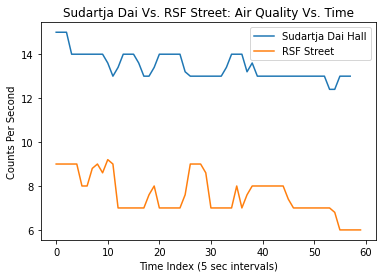

In [189]:
plt.plot(SUDAVENT_AQ["5.0 um"], label = "Sudartja Dai Hall")
plt.plot(RSFSTR_AQ["5.0 um"], label = "RSF Street")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Sudartja Dai Vs. RSF Street: Air Quality Vs. Time")     
plt.legend()
plt.savefig('SudartjaXRSF_Air.png',dpi=300)
plt.show()

In [190]:
SR_counts_diff_mean = SUDAVENT_mean_cps - RSFSTR_mean_cps
SUDAVENT_mean_sig_RSFSTR = SR_counts_diff_mean / SUDAVENT_std_cps
RSFSTR_mean_sig_SUDAVENT = SR_counts_diff_mean / RSFSTR_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the RSFSTR station".format(SUDAVENT_mean_sig_RSFSTR))
print ("The mean number of counts collected on the street at the RSFSTR station was {} sigma away from the number of counts collected on the street at the freeway exit".format(RSFSTR_mean_sig_SUDAVENT))

The mean number of counts collected on the street at the freeway exit was 1.642983021387293 sigma away from the number of counts collected on the street at the RSFSTR station
The mean number of counts collected on the street at the RSFSTR station was 1.6594374262231157 sigma away from the number of counts collected on the street at the freeway exit


In [191]:
PE_counts_diff_mean = PHYSBLDG_mean_cps - ETCH_mean_cps
PHYSBLDG_mean_sig_ETCH = PE_counts_diff_mean / PHYSBLDG_std_cps
ETCH_mean_sig_PHYSBLDG = PE_counts_diff_mean / ETCH_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the ETCH station".format(PHYSBLDG_mean_sig_ETCH))
print ("The mean number of counts collected on the street at the ETCH station was {} sigma away from the number of counts collected on the street at the freeway exit".format(ETCH_mean_sig_PHYSBLDG))

The mean number of counts collected on the street at the freeway exit was 9.002816920726126 sigma away from the number of counts collected on the street at the ETCH station
The mean number of counts collected on the street at the ETCH station was 22.43037014333617 sigma away from the number of counts collected on the street at the freeway exit


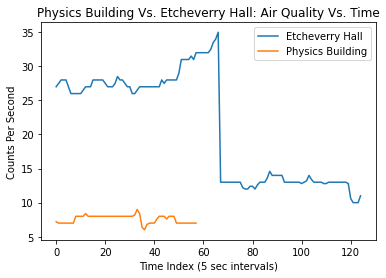

In [192]:
plt.plot(ETCH_AQ["5.0 um"], label = "Etcheverry Hall")
plt.plot(PHYSBLDG_AQ["5.0 um"], label = "Physics Building")
plt.ylabel('Counts Per Second') 
plt.xlabel('Time Index (5 sec intervals)')
plt.title("Physics Building Vs. Etcheverry Hall: Air Quality Vs. Time")     
plt.legend()
plt.savefig('PhysicsXEtch_Air.png',dpi=300)
plt.show()

In [193]:
AC_counts_diff_mean = AMTRAK_mean_cps - CROADS_mean_cps
AMTRAK_mean_sig_CROADS = AC_counts_diff_mean / AMTRAK_std_cps
CROADS_mean_sig_AMTRAK = AC_counts_diff_mean / CROADS_std_cps


print ("The mean number of counts collected on the street at the freeway exit was {} sigma away from the number of counts collected on the street at the CROADS station".format(AMTRAK_mean_sig_CROADS))
print ("The mean number of counts collected on the street at the CROADS station was {} sigma away from the number of counts collected on the street at the freeway exit".format(CROADS_mean_sig_AMTRAK))

The mean number of counts collected on the street at the freeway exit was 3.6686068638977964 sigma away from the number of counts collected on the street at the CROADS station
The mean number of counts collected on the street at the CROADS station was 4.266621799060072 sigma away from the number of counts collected on the street at the freeway exit


No handles with labels found to put in legend.


CPS Sigma Differences: 
Crossroads VS RSF: -5.017289277377043 sigma
Freeway Exit VS RSF: 1.1287893511432592 sigma
North Berkeley Bart VS Downtown Berkeley Bart: 1.1999819861021652 sigma
North Berkeley Bart VS RSF: 2.8375241058773053 sigma
AMTRAK VS Croassroads: 3.6686068638977964 sigma
Marina Boat Docks VS Boat Launch: 0.9143779600027916 sigma
Marina Boat Launch VS Freeway Exit: 5.3434909181042345 sigma
Physics Building VS Sudartja Dai Hall: 3.3840182818133875 sigma
Physics Building VS Etcheverry Hall: 9.002816920726126 sigma
Physics Building VS Freeway Exit: 3.740620475014362 sigma
Sudartja Dai Hall VS RSF: 1.642983021387293 sigma


<function matplotlib.pyplot.show(close=None, block=None)>

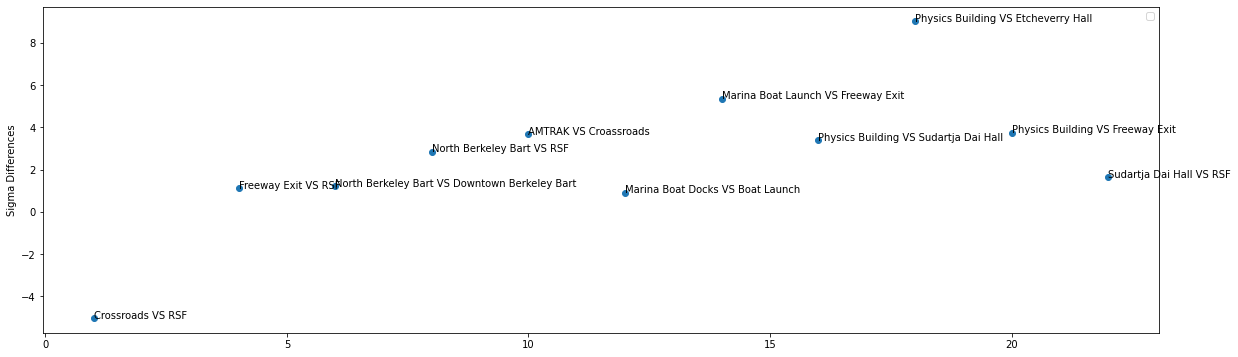

In [242]:
#Feedback Additions
#These were the ones in the presentation
print("CPS Sigma Differences: ") 
print("Crossroads VS RSF:",CROADS_mean_sig,"sigma")
print("Freeway Exit VS RSF:",RSFSTR_mean_sig_FRWY,"sigma")
print("North Berkeley Bart VS Downtown Berkeley Bart:",NRTBERK_mean_sig_DWNTWNBERK,"sigma")
print("North Berkeley Bart VS RSF:",NRTBERK_mean_sig_RSFSTR,"sigma")
print("AMTRAK VS Croassroads:",AMTRAK_mean_sig_CROADS,"sigma")
print("Marina Boat Docks VS Boat Launch:",MAREXT_mean_sig_MARDOCKS,"sigma")
print("Marina Boat Launch VS Freeway Exit:",FRWY_mean_sig_MAREXT,"sigma")
print("Physics Building VS Sudartja Dai Hall:",PHYSBLDG_mean_sig_SUDAVENT,"sigma")
print("Physics Building VS Etcheverry Hall:",PHYSBLDG_mean_sig_ETCH,"sigma") #This changed due to the writing error
print("Physics Building VS Freeway Exit:",PHYSBLDG_mean_sig_FRWY,"sigma")
print("Sudartja Dai Hall VS RSF:",SUDAVENT_mean_sig_RSFSTR,"sigma")
sigma_differences = [CROADS_mean_sig,RSFSTR_mean_sig_FRWY,NRTBERK_mean_sig_DWNTWNBERK,NRTBERK_mean_sig_RSFSTR,AMTRAK_mean_sig_CROADS,MAREXT_mean_sig_MARDOCKS,FRWY_mean_sig_MAREXT,PHYSBLDG_mean_sig_SUDAVENT,PHYSBLDG_mean_sig_ETCH,PHYSBLDG_mean_sig_FRWY,SUDAVENT_mean_sig_RSFSTR]
names = ['Crossroads VS RSF','Freeway Exit VS RSF','North Berkeley Bart VS Downtown Berkeley Bart','North Berkeley Bart VS RSF','AMTRAK VS Croassroads','Marina Boat Docks VS Boat Launch','Marina Boat Launch VS Freeway Exit','Physics Building VS Sudartja Dai Hall','Physics Building VS Etcheverry Hall','Physics Building VS Freeway Exit','Sudartja Dai Hall VS RSF']
numbers = [1,4,6,8,10,12,14,16,18,20,22]
plt.figure(figsize=(20,6))
plt.scatter(numbers,sigma_differences)
plt.ylabel('Sigma Differences')
for i, label in enumerate(names):
    plt.annotate(label, (numbers[i], sigma_differences[i]))
plt.legend()
plt.show


In [195]:
CROADS_CPS = CROADS_RAD['Average CPS']
CROADS_CPS = CROADS_CPS[0 : 58]
CROADS_array = np.asarray(CROADS_CPS) 
CROADS_x = CROADS_array.reshape((-1,1))
CROADS_y = CROADS_AQ['5.0 um']
CROADS_model = LinearRegression().fit(CROADS_x,CROADS_y)
print(CROADS_model.score(CROADS_x,CROADS_y))
print("Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation")

0.11933979120311489
Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation


In [196]:
RSF_CPS = RSFSTR_RAD['Average CPS']
RSF_CPS = RSF_CPS[0 : 60]
RSF_array = np.asarray(RSF_CPS) 
RSF_x = RSF_array.reshape((-1,1))
RSF_y = RSFSTR_AQ['5.0 um']
RSF_model = LinearRegression().fit(RSF_x,RSF_y)
print(RSF_model.score(RSF_x,RSF_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.0014852363381221423
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [197]:
FRWY_CPS = FRWY_RAD['Average CPS']
FRWY_CPS = FRWY_CPS[0 : 58]
FRWY_array = np.asarray(FRWY_CPS) 
FRWY_x = FRWY_array.reshape((-1,1))
FRWY_y = FRWY_AQ['5.0 um']
FRWY_model = LinearRegression().fit(FRWY_x,FRWY_y)
print(FRWY_model.score(FRWY_x,FRWY_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.027628441421538752
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


No Air Quality Data for the AMTRAK Station

In [198]:
DWNTWNBERK_CPS = DWNTWNBERK_RAD['Average CPS']
DWNTWNBERK_CPS = DWNTWNBERK_CPS[0 : 56]
DWNTWNBERK_array = np.asarray(DWNTWNBERK_CPS) 
DWNTWNBERK_x = DWNTWNBERK_array.reshape((-1,1))
DWNTWNBERK_y = DWNTWNBERK_AQ['5.0 um']
DWNTWNBERK_model = LinearRegression().fit(DWNTWNBERK_x,DWNTWNBERK_y)
print(DWNTWNBERK_model.score(DWNTWNBERK_x,DWNTWNBERK_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.02518032725915398
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [199]:
NRTBERK_CPS = NRTBERK_RAD['Average CPS']
NRTBERK_CPS = NRTBERK_CPS[0 : 59]
NRTBERK_array = np.asarray(NRTBERK_CPS) 
NRTBERK_x = NRTBERK_array.reshape((-1,1))
NRTBERK_y = NRTBERK_AQ['5.0 um']
NRTBERK_model = LinearRegression().fit(NRTBERK_x,NRTBERK_y)
print(NRTBERK_model.score(NRTBERK_x,NRTBERK_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.08333853629119792
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


No Air Quality Data was available for the Marina

In [200]:
ETCH_CPS = ETCH_RAD['Average CPS']
ETCH_array = np.asarray(ETCH_CPS) 
ETCH_x = ETCH_array.reshape((-1,1))
ETCH_fitted_AQ = ETCH_AQ['5.0 um']
ETCH_fitted_AQ = ETCH_fitted_AQ[0 : 60]
ETCH_y = ETCH_fitted_AQ
ETCH_model = LinearRegression().fit(ETCH_x,ETCH_y)
print(ETCH_model.score(ETCH_x,ETCH_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.015796672363770137
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [201]:
PHYSBLDG_CPS = PHYSBLDG_RAD['Average CPS']
PHYSBLDG_CPS = PHYSBLDG_CPS[0 : 58]
PHYSBLDG_array = np.asarray(PHYSBLDG_CPS) 
PHYSBLDG_x = PHYSBLDG_array.reshape((-1,1))
PHYSBLDG_y = PHYSBLDG_AQ['5.0 um']
PHYSBLDG_model = LinearRegression().fit(PHYSBLDG_x,PHYSBLDG_y)
print(PHYSBLDG_model.score(PHYSBLDG_x,PHYSBLDG_y))
print("Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation")

0.1593845250644118
Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation


In [202]:
SUDAVENT_CPS = SUDAVENT_RAD['Average CPS']
SUDAVENT_CPS = SUDAVENT_CPS[0 : 58]
SUDAVENT_array = np.asarray(SUDAVENT_CPS) 
SUDAVENT_x = SUDAVENT_array.reshape((-1,1))
SUDAVENT_y = SUDAVENT_AQ['5.0 um']
SUDAVENT_model = LinearRegression().fit(SUDAVENT_x,SUDAVENT_y)
print(SUDAVENT_model.score(SUDAVENT_x,SUDAVENT_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.002302862015725715
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


From the rough regressional analysis done we can assume there is a very tenious, if any, correlation between radiation and air quality

In [203]:
CROADSRSF_CPS = CROADS_RAD['Average CPS']
CROADSRSF_CPS = CROADSRSF_CPS[0 : 66]
CROADSRSF_array = np.asarray(CROADSRSF_CPS) 
CROADSRSF_x = CROADSRSF_array.reshape((-1,1))
CROADSRSF_y = RSFSTR_RAD['Average CPS']
CROADSRSF_model = LinearRegression().fit(CROADSRSF_x,CROADSRSF_y)
print(CROADSRSF_model.score(CROADSRSF_x,CROADSRSF_y))
print("Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation")

0.14934020314675978
Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation


In [204]:
FRWYRSF_CPS = FRWY_RAD['Average CPS']
FRWYRSF_array = np.asarray(FRWYRSF_CPS) 
FRWYRSF_x = FRWYRSF_array.reshape((-1,1))
FRWYRSF_fitted_RAD = RSFSTR_RAD['Average CPS']
FRWYRSF_fitted_RAD = FRWYRSF_fitted_RAD[0 : 63]
FRWYRSF_y = FRWYRSF_fitted_RAD
FRWYRSF_model = LinearRegression().fit(FRWYRSF_x,FRWYRSF_y)
print(FRWYRSF_model.score(FRWYRSF_x,FRWYRSF_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.009912877608025172
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [205]:
FRWYRSF_CPS = FRWY_RAD['Average CPS']
FRWYRSF_array = np.asarray(FRWYRSF_CPS) 
FRWYRSF_x = FRWYRSF_array.reshape((-1,1))
FRWYRSF_fitted_RAD = RSFSTR_RAD['Average CPS']
FRWYRSF_fitted_RAD = FRWYRSF_fitted_RAD[0 : 63]
FRWYRSF_y = FRWYRSF_fitted_RAD
FRWYRSF_model = LinearRegression().fit(FRWYRSF_x,FRWYRSF_y)
print(FRWYRSF_model.score(FRWYRSF_x,FRWYRSF_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.009912877608025172
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [206]:
NRTDWMTWNBERK_CPS = NRTBERK_RAD['Average CPS']
NRTDWMTWNBERK_CPS = NRTDWMTWNBERK_CPS[0 : 56]
NRTDWMTWNBERK_array = np.asarray(NRTDWMTWNBERK_CPS) 
NRTDWMTWNBERK_x = NRTDWMTWNBERK_array.reshape((-1,1))
NRTDWMTWNBERK_y_CPS = DWNTWNBERK_RAD['Average CPS']
NRTDWMTWNBERK_y_CPS = NRTDWMTWNBERK_y_CPS[0 : 56]
NRTDWMTWNBERK_y = NRTDWMTWNBERK_y_CPS
NRTDWMTWNBERK_model = LinearRegression().fit(NRTDWMTWNBERK_x,NRTDWMTWNBERK_y)
print(NRTDWMTWNBERK_model.score(NRTDWMTWNBERK_x,NRTDWMTWNBERK_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.04175279948841648
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [207]:
RSFNRTBERK_CPS = NRTBERK_RAD['Average CPS']
RSFNRTBERK_CPS = RSFNRTBERK_CPS[0 : 56]
RSFNRTBERK_array = np.asarray(RSFNRTBERK_CPS) 
RSFNRTBERK_x = RSFNRTBERK_array.reshape((-1,1))
RSFNRTBERK_CPS = RSFSTR_RAD['Average CPS']
RSFNRTBERK_CPS = RSFNRTBERK_CPS[0 : 56]
RSFNRTBERK_y = RSFNRTBERK_CPS
RSFNRTBERK_model = LinearRegression().fit(RSFNRTBERK_x,RSFNRTBERK_y)
print(RSFNRTBERK_model.score(RSFNRTBERK_x,RSFNRTBERK_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.0007497338532590492
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [208]:
CROADSAMTRAK_CPS = CROADS_RAD['Average CPS']
CROADSAMTRAK_CPS = CROADSAMTRAK_CPS[0 : 63]
CROADSAMTRAK_array = np.asarray(CROADSAMTRAK_CPS) 
CROADSAMTRAK_x = CROADSAMTRAK_array.reshape((-1,1))
CROADSAMTRAK_y = AMTRAK_RAD['Average CPS']
CROADSAMTRAK_model = LinearRegression().fit(CROADSAMTRAK_x,CROADSAMTRAK_y)
print(CROADSAMTRAK_model.score(CROADSAMTRAK_x,CROADSAMTRAK_y))
print("Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation")

0.021338227134358068
Since the R^2 value is low, we can assume a statical insiginificance in regards to correlation


In [209]:
MARINA_CPS = MARDOCKS_RAD['Average CPS']
MARINA_CPS = MARINA_CPS[0 : 56]
MARINA_array = np.asarray(MARINA_CPS) 
MARINA_x = MARINA_array.reshape((-1,1))
MARINA_y_CPS = MAREXT_RAD['Average CPS']
MARINA_y_CPS = MARINA_y_CPS[0 : 56]
MARINA_y = MARINA_y_CPS
MARINA_model = LinearRegression().fit(MARINA_x,MARINA_y)
print(MARINA_model.score(MARINA_x,MARINA_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.002053081190333539
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [210]:
MARINAFRWY_CPS = MAREXT_RAD['Average CPS']
MARINAFRWY_CPS = MARINAFRWY_CPS[0 : 56]
MARINAFRWY_array = np.asarray(MARINAFRWY_CPS) 
MARINAFRWY_x = MARINAFRWY_array.reshape((-1,1))
MARINAFRWY_y_CPS = FRWY_RAD['Average CPS']
MARINAFRWY_y_CPS = MARINAFRWY_y_CPS[0 : 56]
MARINAFRWY_y = MARINAFRWY_y_CPS
MARINAFRWY_model = LinearRegression().fit(MARINAFRWY_x,MARINAFRWY_y)
print(MARINAFRWY_model.score(MARINAFRWY_x,MARINAFRWY_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.0015335969851016928
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [211]:
PHYSBLDGSUDAVENT_CPS = PHYSBLDG_RAD['Average CPS']
PHYSBLDGSUDAVENT_CPS = PHYSBLDGSUDAVENT_CPS[0 : 56]
PHYSBLDGSUDAVENT_array = np.asarray(PHYSBLDGSUDAVENT_CPS) 
PHYSBLDGSUDAVENT_x = PHYSBLDGSUDAVENT_array.reshape((-1,1))
PHYSBLDGSUDAVENT_y_CPS = SUDAVENT_RAD['Average CPS']
PHYSBLDGSUDAVENT_y_CPS = PHYSBLDGSUDAVENT_y_CPS[0 : 56]
PHYSBLDGSUDAVENT_y = PHYSBLDGSUDAVENT_y_CPS
PHYSBLDGSUDAVENT_model = LinearRegression().fit(PHYSBLDGSUDAVENT_x,PHYSBLDGSUDAVENT_y)
print(PHYSBLDGSUDAVENT_model.score(PHYSBLDGSUDAVENT_x,PHYSBLDGSUDAVENT_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.05637558550578614
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [212]:
PHYSBLDGETCH_CPS = PHYSBLDG_RAD['Average CPS']
PHYSBLDGETCH_CPS = PHYSBLDGETCH_CPS[0 : 56]
PHYSBLDGETCH_array = np.asarray(PHYSBLDGETCH_CPS) 
PHYSBLDGETCH_x = PHYSBLDGETCH_array.reshape((-1,1))
PHYSBLDGETCH_y_CPS = ETCH_RAD['Average CPS']
PHYSBLDGETCH_y_CPS = PHYSBLDGETCH_y_CPS[0 : 56]
PHYSBLDGETCH_y = PHYSBLDGETCH_y_CPS
PHYSBLDGETCH_model = LinearRegression().fit(PHYSBLDGETCH_x,PHYSBLDGETCH_y)
print(PHYSBLDGETCH_model.score(PHYSBLDGETCH_x,PHYSBLDGETCH_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.014609089516271268
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [213]:
PHYSBLDGFRWY_CPS = PHYSBLDG_RAD['Average CPS']
PHYSBLDGFRWY_CPS = PHYSBLDGFRWY_CPS[0 : 56]
PHYSBLDGFRWY_array = np.asarray(PHYSBLDGFRWY_CPS) 
PHYSBLDGFRWY_x = PHYSBLDGFRWY_array.reshape((-1,1))
PHYSBLDGFRWY_y_CPS = FRWY_RAD['Average CPS']
PHYSBLDGFRWY_y_CPS = PHYSBLDGFRWY_y_CPS[0 : 56]
PHYSBLDGFRWY_y = PHYSBLDGFRWY_y_CPS
PHYSBLDGFRWY_model = LinearRegression().fit(PHYSBLDGFRWY_x,PHYSBLDGFRWY_y)
print(PHYSBLDGFRWY_model.score(PHYSBLDGFRWY_x,PHYSBLDGFRWY_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.06818097844857618
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation


In [214]:
RSFSUDAVENT_CPS = RSFSTR_RAD['Average CPS']
RSFSUDAVENT_CPS = RSFSUDAVENT_CPS[0 : 56]
RSFSUDAVENT_array = np.asarray(RSFSUDAVENT_CPS) 
RSFSUDAVENT_x = PHYSBLDGSUDAVENT_array.reshape((-1,1))
RSFSUDAVENT_y_CPS = SUDAVENT_RAD['Average CPS']
RSFSUDAVENT_y_CPS = RSFSUDAVENT_y_CPS[0 : 56]
RSFSUDAVENT_y = RSFSUDAVENT_y_CPS
RSFSUDAVENT_model = LinearRegression().fit(RSFSUDAVENT_x,RSFSUDAVENT_y)
print(RSFSUDAVENT_model.score(RSFSUDAVENT_x,RSFSUDAVENT_y))
print("Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation")

0.05637558550578614
Since the R^2 value is extremely low, we can assume a statical insiginificance in regards to correlation
